In [23]:
from __future__ import print_function
import numpy as np
from numpy import dot
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [24]:
def prepend_one(X):
    """prepend a one vector to X."""
    return np.column_stack([np.ones(X.shape[0]), X])
# X=np.random.rand(3,3)
# X=prepend_one(X)
# print(X)

In [25]:
def grid2d(start, end, num=50):
    """Create an 2D array where each row is a 2D coordinate.
    np.meshgrid is pretty annoying!
    """
    dom = np.linspace(start, end, num)
    print(dom.shape)
    X0, X1 = np.meshgrid(dom, dom)
#     print(X0.shape)
#     print(X1)
    return np.column_stack([X0.flatten(), X1.flatten()])

In [26]:
# X=grid2d(1,100,num=50)
# X=prepend_one(X)
# X



In [27]:
# load the data
#data = np.loadtxt("https://ipvs.informatik.uni-stuttgart.de/mlr/marc/teaching/data/dataLinReg2D.txt")
data =np.loadtxt("https://ipvs.informatik.uni-stuttgart.de/mlr/marc/teaching/data/dataQuadReg2D.txt")
print("data.shape:", data.shape)

data.shape: (100, 3)


In [28]:
X, y = data[:, :2], data[:, 2]
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (100, 2)
y.shape: (100,)


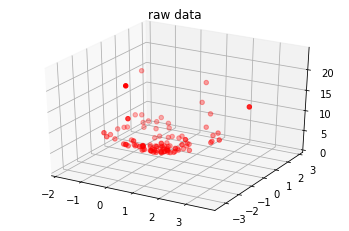

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection arg is important!
ax.scatter(X[:, 0], X[:, 1], y, color="red")
ax.set_title("raw data")
plt.draw()

In [30]:
X = prepend_one(X)
# print(X)
#print(type(np.multiply(X[:,1],X[:,2])))
#p=np.multiply(X[:,1],X[:,2])
#p=p.reshape(100,1)
#print(p)

X=np.append(X,np.multiply(X[:,1],X[:,2]).reshape(100,1),axis=1)
X=np.append(X,np.multiply(X[:,1],X[:,1]).reshape(100,1),axis=1)
X=np.append(X,np.multiply(X[:,2],X[:,2]).reshape(100,1),axis=1)


print("X.shape:", X.shape)

X.shape: (100, 6)


In [45]:
#2.27675000e-02*2.27675000e-02

In [32]:
# X

In [33]:
beta_ = mdot([inv(dot(X.T, X)), X.T, y])
print("Optimal beta:", beta_)

Optimal beta: [ 1.26428783 -0.15318758 -0.27072946 -0.75215957  1.08730116  1.72877749]


In [34]:
X_grid = prepend_one(grid2d(-3, 3, num=30))#testset data
X_grid

(30,)


array([[ 1.        , -3.        , -3.        ],
       [ 1.        , -2.79310345, -3.        ],
       [ 1.        , -2.5862069 , -3.        ],
       ...,
       [ 1.        ,  2.5862069 ,  3.        ],
       [ 1.        ,  2.79310345,  3.        ],
       [ 1.        ,  3.        ,  3.        ]])

In [35]:
#grid2d(-3, 3, num=30)
X_grid=np.append(X_grid,np.multiply(X_grid[:,1],X_grid[:,2]).reshape(900,1),axis=1)
X_grid=np.append(X_grid,np.multiply(X_grid[:,1],X_grid[:,1]).reshape(900,1),axis=1)
X_grid=np.append(X_grid,np.multiply(X_grid[:,2],X_grid[:,2]).reshape(900,1),axis=1)
print("X_grid.shape:", X_grid.shape)

X_grid.shape: (900, 6)


In [36]:
y_grid = dot(X_grid, beta_)
print("Y_grid.shape", y_grid.shape)

Y_grid.shape (900,)


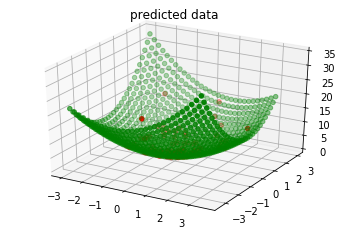

In [37]:
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection part is important
ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid,color='green') # dont use the 1 infront
ax.scatter(X[:, 1], X[:, 2], y, color="red") # also show the real data
ax.set_title("predicted data")
plt.show()

In [38]:
print(X)
# print(X_grid.shape)
# dot(X,beta_ridge)
# print(beta_ridge.shape)
# z=X*beta_ridge
# z.shape


[[ 1.00000000e+00  3.34757000e-01  2.27675000e-02  7.62158000e-03
   1.12062249e-01  5.18359056e-04]
 [ 1.00000000e+00  2.30482000e-01 -6.29902000e-01 -1.45181073e-01
   5.31219523e-02  3.96776530e-01]
 [ 1.00000000e+00 -9.87773000e-01  1.13330000e+00 -1.11944314e+00
   9.75695500e-01  1.28436889e+00]
 [ 1.00000000e+00  2.25141000e-01 -2.61015000e+00 -5.87651781e-01
   5.06884699e-02  6.81288302e+00]
 [ 1.00000000e+00  1.42352000e+00 -9.98329000e-01 -1.42114130e+00
   2.02640919e+00  9.96660792e-01]
 [ 1.00000000e+00  2.95134000e-03  1.04621000e+00  3.08772142e-03
   8.71040780e-06  1.09455536e+00]
 [ 1.00000000e+00 -4.10767000e-01  1.51934000e-01 -6.24094734e-02
   1.68729528e-01  2.30839404e-02]
 [ 1.00000000e+00  7.59950000e-01  6.91284000e-01  5.25341276e-01
   5.77524003e-01  4.77873569e-01]
 [ 1.00000000e+00 -5.36114000e-01 -1.40021000e-01  7.50672184e-02
   2.87418221e-01  1.96058804e-02]
 [ 1.00000000e+00  2.20158000e+00  3.06695000e-01  6.75213578e-01
   4.84695450e+00  9.4061

In [39]:
# # s=dot(beta_ridge,beta_ridge)
# # s
# I=np.eye(6)
# I[0,0]=0
# # I
# lamb=10
# beta_ridge = mdot([inv(dot(X.T, X)+lamb*I), X.T, y])
# sum=0
# beta_sqr=0
# for i in range(X.shape[1]):
#     sum+=(y[i]-dot(X[i].T,beta_ridge))**2
#     if i==0:
#             continue
#     beta_sqr+=beta_ridge[i]**2

# print(sum+lamb*beta_sqr)

Lambda=  0.0001
(6, 6)
Optimal beta ridge: [ 1.26428883 -0.15318709 -0.27072928 -0.75215892  1.08730066  1.72877692]
Y_grid.shape (900,)
squared_error=  1.1882808592684935
(100, 6)


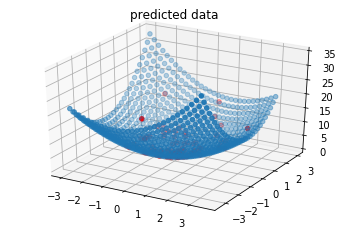

Lambda=  0.001
(6, 6)
Optimal beta ridge: [ 1.26429779 -0.15318269 -0.27072765 -0.75215307  1.08729611  1.72877178]
Y_grid.shape (900,)
squared_error=  1.1882808805377694
(100, 6)


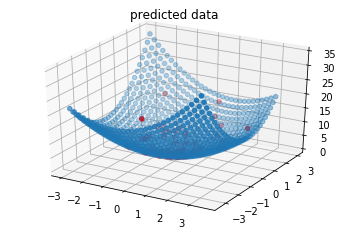

Lambda=  0.01
(6, 6)
Optimal beta ridge: [ 1.26438741 -0.15313874 -0.27071141 -0.75209459  1.08725067  1.7287204 ]
Y_grid.shape (900,)
squared_error=  1.1882830072363142
(100, 6)


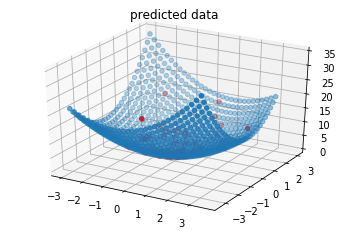

Lambda=  0.1
(6, 6)
Optimal beta ridge: [ 1.26528321 -0.15269986 -0.27054915 -0.7515103   1.08679652  1.72820681]
Y_grid.shape (900,)
squared_error=  1.1884954482430978
(100, 6)


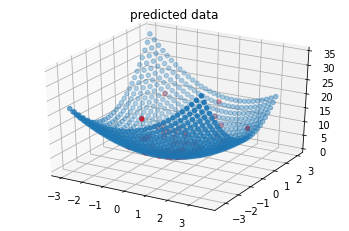

Lambda=  1.0
(6, 6)
Optimal beta ridge: [ 1.27420334 -0.14837815 -0.26893773 -0.74572005  1.08228324  1.72308756]
Y_grid.shape (900,)
squared_error=  1.2095134754928776
(100, 6)


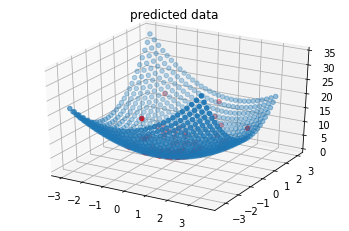

Lambda=  10.0
(6, 6)
Optimal beta ridge: [ 1.35984174 -0.11102255 -0.25386633 -0.69266262  1.03972456  1.67350733]
Y_grid.shape (900,)
squared_error=  3.109632256267969
(100, 6)


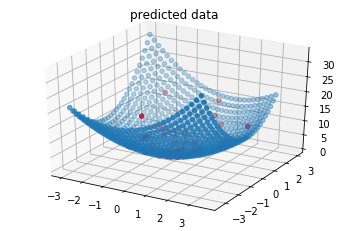

Lambda=  100.0
(6, 6)
Optimal beta ridge: [ 1.97977847  0.02386293 -0.16390406 -0.41375935  0.75876006  1.2986846 ]
Y_grid.shape (900,)
squared_error=  97.30221205105838
(100, 6)


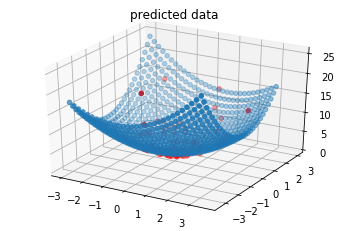

Lambda=  1000.0
(6, 6)
Optimal beta ridge: [ 3.37534983  0.0324239  -0.03785317 -0.08974265  0.21122567  0.39949301]
Y_grid.shape (900,)
squared_error=  779.5216864945324
(100, 6)


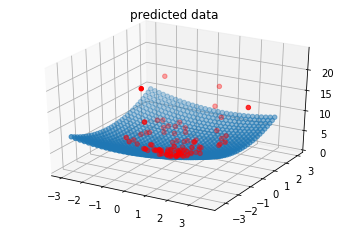

Lambda=  10000.0
(6, 6)
Optimal beta ridge: [ 3.8961752   0.00455788 -0.00443008 -0.0103745   0.02578338  0.05038794]
Y_grid.shape (900,)
squared_error=  1202.153266836758
(100, 6)


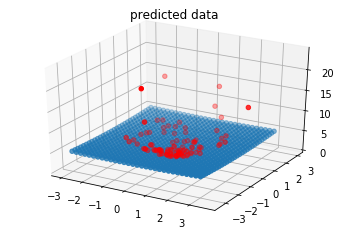

Lambda=  100000.0
(6, 6)
Optimal beta ridge: [ 3.96293822e+00  4.72840358e-04 -4.50960924e-04 -1.05454103e-03
  2.63663278e-03  5.17393009e-03]
Y_grid.shape (900,)
squared_error=  1263.0848451012241
(100, 6)


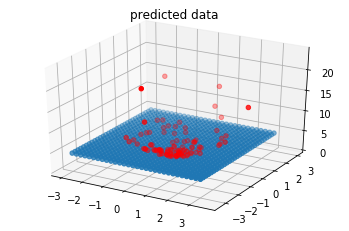

Lambda=  1000000.0
(6, 6)
Optimal beta ridge: [ 3.96980342e+00  4.74595223e-05 -4.51775344e-05 -1.05628892e-04
  2.64260881e-04  5.18784278e-04]
Y_grid.shape (900,)
squared_error=  1269.4380667545145
(100, 6)


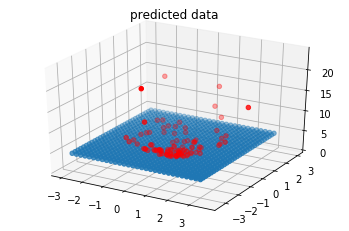

Lambda=  10000000.0
(6, 6)
Optimal beta ridge: [ 3.97049188e+00  4.74771220e-06 -4.51856983e-06 -1.05646411e-05
  2.64320792e-05  5.18923816e-05]
Y_grid.shape (900,)
squared_error=  1270.0760899210711
(100, 6)


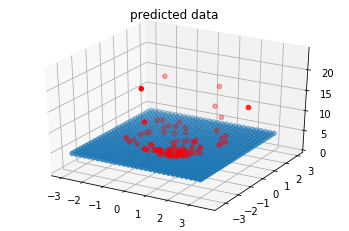

In [40]:
##Ridge reg.

lamb=0.0001
while lamb <=10000000:
    print("Lambda= ",lamb)
    error=0
    beta_sqr=0
    I=np.eye(X.shape[1])
    print(I.shape)
    I[0,0]=0 # beta_1 i.e. intercept is not regularised
    beta_ridge = mdot([inv(dot(X.T, X)+lamb*I), X.T, y])
    #error=(y-dot(X,beta_ridge))
    print("Optimal beta ridge:", beta_ridge)
    y_grid = dot(X_grid, beta_ridge)
    print("Y_grid.shape", y_grid.shape)
    
    for i in range(X.shape[0]):
        error+=(y[i]-dot(X[i].T,beta_ridge))**2
        
    for j in range(1,len(beta_ridge)):
        beta_sqr+=beta_ridge[j]**2
        
    squared_error=error#+lamb*beta_sqr
    
    #dot(error,error)+lamb*dot(beta_ridge,beta_ridge)
    print("squared_error= ",squared_error)
    lamb=lamb*10
    print(X.shape)
    # vis the result
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') # the projection part is important
    ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid) # dont use the 1 infront
    ax.scatter(X[:, 1], X[:, 2], y, color="red") # also show the real data
    ax.set_title("predicted data")
    plt.show()

In [41]:
# k=5
# d=np.split(X,k)
# c=np.split(y,k)
# beta=list()


In [42]:
# for lamb in range(0,10000,100):
#     print("Lambda= ",lamb)
#     I=np.eye(X.shape[1])
#     print(I.shape)
    
#     for i in range(k):
#         beta.append(mdot([inv(dot(d[i].T, d[i])+lamb*I), d[i].T, c[i]]))
        

In [43]:
dot(beta_ridge,beta_ridge)

15.764805790082649

In [44]:
dot(error.T,error)

1613093.2741891968